<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n250.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.265991,77.965234,34.898356,86.036750,12.258577,314.424908,317.539631,-3.114723
1,0.0,1.0,30.415758,45.034752,99.565462,38.206302,-73.661864,149.560409,168.518614,-18.958205
2,0.0,2.0,83.150607,28.138278,84.726705,69.588152,59.458039,335.061781,208.635266,126.426514
3,0.0,3.0,80.051468,52.330737,56.163920,63.536811,80.752352,342.835289,250.730428,92.104861
4,0.0,4.0,53.877347,89.482105,70.776297,47.816865,-30.477085,241.475530,255.395867,-13.920337
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.222626,24.117420,63.081608,61.243081,104.195269,348.860004,263.131046,85.728958
29996,999.0,26.0,74.788745,29.406344,53.488228,30.227925,49.284137,247.195380,156.341087,90.854293
29997,999.0,27.0,33.010193,93.146009,64.022871,50.646775,-170.323000,80.502849,167.139330,-86.636481
29998,999.0,28.0,60.090481,38.433615,69.529753,68.024568,-54.102092,191.976325,247.536895,-55.560570


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.265991,77.965234,34.898356,86.036750,12.258577,314.424908,317.539631,-3.114723
1,0.0,1.0,30.415758,45.034752,99.565462,38.206302,-73.661864,149.560409,168.518614,-18.958205
2,0.0,2.0,83.150607,28.138278,84.726705,69.588152,59.458039,335.061781,208.635266,126.426514
3,0.0,3.0,80.051468,52.330737,56.163920,63.536811,80.752352,342.835289,250.730428,92.104861
4,0.0,4.0,53.877347,89.482105,70.776297,47.816865,-30.477085,241.475530,255.395867,-13.920337
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.222626,24.117420,63.081608,61.243081,104.195269,348.860004,263.131046,85.728958
29996,999.0,26.0,74.788745,29.406344,53.488228,30.227925,49.284137,247.195380,156.341087,90.854293
29997,999.0,27.0,33.010193,93.146009,64.022871,50.646775,-170.323000,80.502849,167.139330,-86.636481
29998,999.0,28.0,60.090481,38.433615,69.529753,68.024568,-54.102092,191.976325,247.536895,-55.560570


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    93.265991  77.965234  34.898356  86.036750   12.258577   
      1.0    30.415758  45.034752  99.565462  38.206302  -73.661864   
      2.0    83.150607  28.138278  84.726705  69.588152   59.458039   
      3.0    80.051468  52.330737  56.163920  63.536811   80.752352   
      4.0    53.877347  89.482105  70.776297  47.816865  -30.477085   
...                ...        ...        ...        ...         ...   
999.0 25.0   86.222626  24.117420  63.081608  61.243081  104.195269   
      26.0   74.788745  29.406344  53.488228  30.227925   49.284137   
      27.0   33.010193  93.146009  64.022871  50.646775 -170.323000   
      28.0   60.090481  38.433615  69.529753  68.024568  -54.102092   
      29.0   64.271748  81.348561  28.589017  91.797022 -424.129316   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    314.424908  317.539631   -3.114723  
      1.0    149.560409  168.518614  -18.958205  
      2.0    335.061781  208.635266  126.426514  
      3.0    342.835289  250.730428   92.104861  
      4.0    241.475530  255.395867  -13.920337  
...                 ...         ...         ...  
999.0 25.0   348.860004  263.131046   85.728958  
      26.0   247.195380  156.341087   90.854293  
      27.0    80.502849  167.139330  -86.636481  
      28.0   191.976325  247.536895  -55.560570  
      29.0  -148.122967  137.407934 -285.530902  

[30000 rows x 8 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    93.265991  77.965234  34.898356  86.036750   12.258577   
      1.0    30.415758  45.034752  99.565462  38.206302  -73.661864   
      2.0    83.150607  28.138278  84.726705  69.588152   59.458039   
      3.0    80.051468  52.330737  56.163920  63.536811   80.752352   
      4.0    53.877347  89.482105  70.776297  47.816865  -30.477085   
...                ...        ...        ...        ...         ...   
999.0 25.0   86.222626  24.117420  63.081608  61.243081  104.195269   
      26.0   74.788745  29.406344  53.488228  30.227925   49.284137   
      27.0   33.010193  93.146009  64.022871  50.646775 -170.323000   
      28.0   60.090481  38.433615  69.529753  68.024568  -54.102092   
      29.0   64.271748  81.348561  28.589017  91.797022 -424.129316   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    314.424908  317.539631   -3.114723  
      1.0    149.560409  168.518614  -18.958205  
      2.0    335.061781  208.635266  126.426514  
      3.0    342.835289  250.730428   92.104861  
      4.0    241.475530  255.395867  -13.920337  
...                 ...         ...         ...  
999.0 25.0   348.860004  263.131046   85.728958  
      26.0   247.195380  156.341087   90.854293  
      27.0    80.502849  167.139330  -86.636481  
      28.0   191.976325  247.536895  -55.560570  
      29.0  -148.122967  137.407934 -285.530902  

[30000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.265991,77.965234,34.898356,86.036750,12.258577,314.424908,317.539631,-3.114723
1,0.0,1.0,30.415758,45.034752,99.565462,38.206302,-73.661864,149.560409,168.518614,-18.958205
2,0.0,2.0,83.150607,28.138278,84.726705,69.588152,59.458039,335.061781,208.635266,126.426514
3,0.0,3.0,80.051468,52.330737,56.163920,63.536811,80.752352,342.835289,250.730428,92.104861
4,0.0,4.0,53.877347,89.482105,70.776297,47.816865,-30.477085,241.475530,255.395867,-13.920337
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.222626,24.117420,63.081608,61.243081,104.195269,348.860004,263.131046,85.728958
29996,999.0,26.0,74.788745,29.406344,53.488228,30.227925,49.284137,247.195380,156.341087,90.854293
29997,999.0,27.0,33.010193,93.146009,64.022871,50.646775,-170.323000,80.502849,167.139330,-86.636481
29998,999.0,28.0,60.090481,38.433615,69.529753,68.024568,-54.102092,191.976325,247.536895,-55.560570


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    93.265991  77.965234  34.898356  86.036750   12.258577   
      1.0    30.415758  45.034752  99.565462  38.206302  -73.661864   
      2.0    83.150607  28.138278  84.726705  69.588152   59.458039   
      3.0    80.051468  52.330737  56.163920  63.536811   80.752352   
      4.0    53.877347  89.482105  70.776297  47.816865  -30.477085   
...                ...        ...        ...        ...         ...   
999.0 25.0   86.222626  24.117420  63.081608  61.243081  104.195269   
      26.0   74.788745  29.406344  53.488228  30.227925   49.284137   
      27.0   33.010193  93.146009  64.022871  50.646775 -170.323000   
      28.0   60.090481  38.433615  69.529753  68.024568  -54.102092   
      29.0   64.271748  81.348561  28.589017  91.797022 -424.129316   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    314.424908  317.539631   -3.114723  
      1.0    149.560409  168.518614  -18.958205  
      2.0    335.061781  208.635266  126.426514  
      3.0    342.835289  250.730428   92.104861  
      4.0    241.475530  255.395867  -13.920337  
...                 ...         ...         ...  
999.0 25.0   348.860004  263.131046   85.728958  
      26.0   247.195380  156.341087   90.854293  
      27.0    80.502849  167.139330  -86.636481  
      28.0   191.976325  247.536895  -55.560570  
      29.0  -148.122967  137.407934 -285.530902  

[30000 rows x 8 columns]

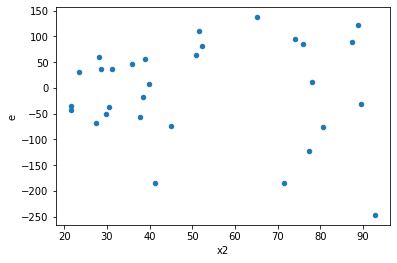

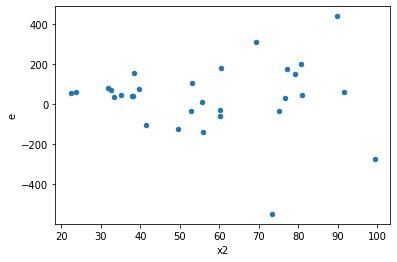

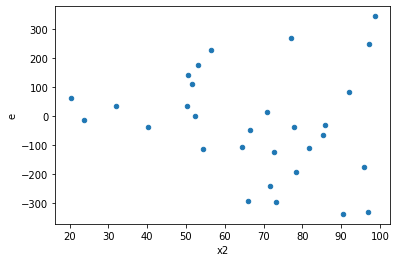

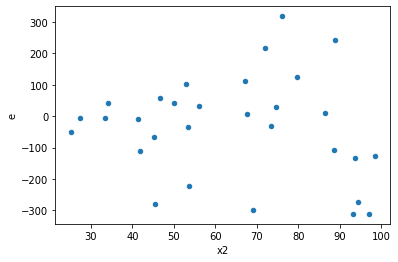

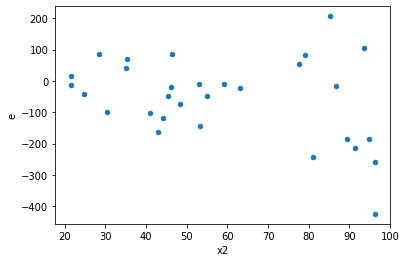

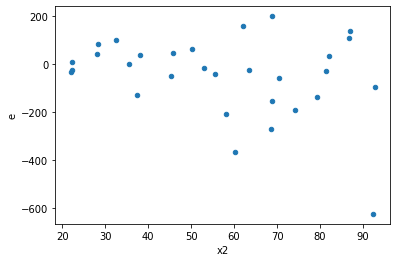

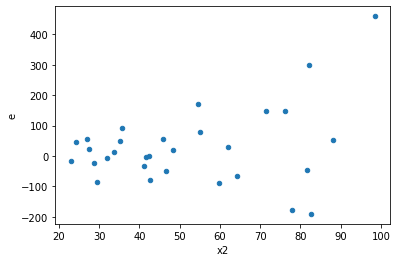

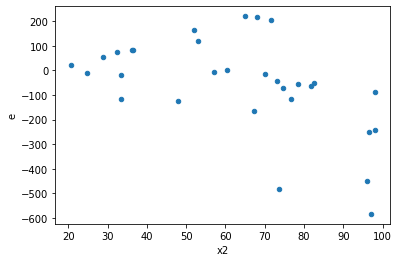

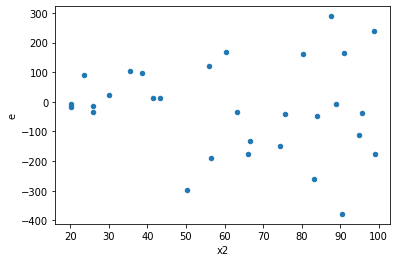

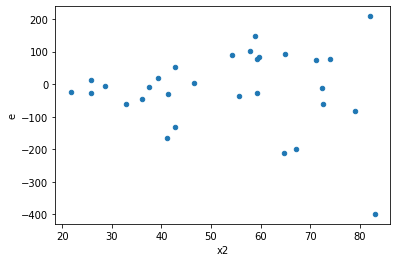

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,14634.674736331426,70242.022306842,1829.3343420414283,8780.25278835525,4.799698221680467,0.03976446699200964,0.9801177665039952,0.01988223349600482,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,11951.345380485982,651026.0229940095,1493.9181725607477,81378.2528742512,54.47303230454684,7.077107891939605e-06,0.999996461446054,3.5385539459698023e-06,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,75622.00761725742,397742.9444336472,9452.750952157177,49717.8680542059,5.259618951757104,0.03033374044808368,0.9848331297759582,0.01516687022404184,Reject005=0 : Heteroscedasticity
3.0,8.0,8.0,90137.66088124564,123196.84602120887,11267.207610155705,15399.605752651109,1.3667632909125296,0.6690397762648939,0.6654801118675531,0.33451988813244693,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,52861.790356030244,246807.32952298888,6607.7237945037805,30850.91619037361,4.66891733822697,0.043089814911968505,0.9784550925440157,0.021544907455984252,Reject005=0 : Heteroscedasticity
5.0,8.0,8.0,30092.824542146805,453034.74023832293,3761.6030677683507,56629.34252979037,15.054576867778584,0.0009041829812403979,0.9995479085093798,0.00045209149062019893,Reject005=0 : Heteroscedasticity
6.0,8.0,8.0,19370.64292990204,231886.10942049292,2421.330366237755,28985.763677561616,11.971007377485412,0.0020440770030856203,0.9989779614984572,0.0010220385015428102,Reject005=0 : Heteroscedasticity
7.0,8.0,8.0,59190.87526218234,160656.60332123016,7398.859407772792,20082.07541515377,2.714212327653741,0.17936836941172496,0.9103158152941375,0.08968418470586248,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,99380.99461777853,429500.4159750392,12422.624327222316,53687.5519968799,4.321756062383026,0.05374672654466872,0.9731266367276656,0.02687336327233436,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,14634.674736331426,70242.022306842,1829.3343420414283,8780.25278835525,4.799698221680467,0.03976446699200964,Reject005=0 : Heteroscedasticity
1.0,8.0,8.0,11951.345380485982,651026.0229940095,1493.9181725607477,81378.2528742512,54.47303230454684,7.077107891939605e-06,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,75622.00761725742,397742.9444336472,9452.750952157177,49717.8680542059,5.259618951757104,0.03033374044808368,Reject005=0 : Heteroscedasticity
3.0,8.0,8.0,90137.66088124564,123196.84602120887,11267.207610155705,15399.605752651109,1.3667632909125296,0.6690397762648939,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,52861.790356030244,246807.32952298888,6607.7237945037805,30850.91619037361,4.66891733822697,0.043089814911968505,Reject005=0 : Heteroscedasticity
5.0,8.0,8.0,30092.824542146805,453034.74023832293,3761.6030677683507,56629.34252979037,15.054576867778584,0.0009041829812403979,Reject005=0 : Heteroscedasticity
6.0,8.0,8.0,19370.64292990204,231886.10942049292,2421.330366237755,28985.763677561616,11.971007377485412,0.0020440770030856203,Reject005=0 : Heteroscedasticity
7.0,8.0,8.0,59190.87526218234,160656.60332123016,7398.859407772792,20082.07541515377,2.714212327653741,0.17936836941172496,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,99380.99461777853,429500.4159750392,12422.624327222316,53687.5519968799,4.321756062383026,0.05374672654466872,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    673
Reject005=1 : Homoscedasticity      327
Name: Result_test, dtype: int64